# Demo: Deep learning with MNIST

## Libraries

As a first step we need to import some libraries

In [0]:
# We use tensorflow's version of Keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading a dataset
For this demo we use the MNIST dataset, which comes included with Keras

In [8]:
from tensorflow.keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Shape of the data
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0],   img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes = 10
y_train_mat = keras.utils.to_categorical(y_train, num_classes)
y_test_mat = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


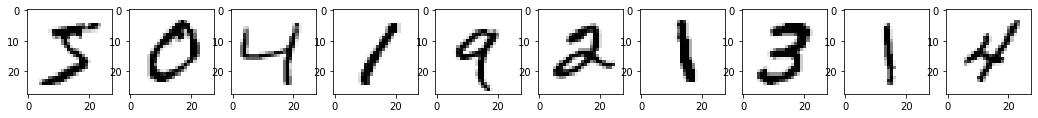

Labels: [5 0 4 1 9 2 1 3 1 4]


In [9]:
# Show some images from the dataset 
plt.figure(None,(18,18))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i].reshape(28,28),"Greys") # Show x_train[i]
plt.show()
# The corresponding labels
print("Labels:",y_train[0:10])

## Building and training a model
Now let's build a model, and train this using the training set

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Train 10 epochs with batches of 128 samples
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train_mat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_mat))

# How well does this model perform on the test set?
score = model.evaluate(x_test, y_test_mat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:
# Plot of accuracy during training
plt.plot(history.epoch,history.history['accuracy'],label="Training accuracy")
plt.plot(history.epoch,history.history['val_accuracy'],label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

plt.plot(history.epoch,history.history['loss'],label="Training loss")
plt.plot(history.epoch,history.history['val_loss'],label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Saving and loading models

In [0]:
# Saving to a file is easy
model.save('my-trained-model.h5')

In [0]:
# To load a model, you don't need to specify the architecture
model2 = keras.models.load_model('my-trained-model.h5')

In [0]:
# Loaded model can be used for prediction and evaluation
score = model2.evaluate(x_test, y_test_mat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## CPU training

In [10]:
# Let's train again, but training on the CPU
# Only 1 epoch
with tf.device('/CPU:0'):
  history = model.fit(x_train, y_train_mat,
                      batch_size=batch_size,
                      epochs=1,
                      verbose=1,
                      validation_data=(x_test, y_test_mat))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0246 - acc: 0.9918 - val_loss: 0.0269 - val_acc: 0.9922


## Questions
Here are some questions for you

1. The MNIST dataset consists of 60000 images for the trainingset, and 10000 for the testset. Looking at the accuracy, how many images from the testset are classified incorrectly?

1. If we change the model by adding or removing layers, how does this affect the accuracy?

1. Looking at the training loss, is there any point in continuing to train?

## Incorrect classification
Let's have a look at the inputs that are hard to classify for the network. Maybe this gives us some ideas.

In [0]:
# Use the model to predict the labels of the test set
predicted_test = model.predict(x_test, batch_size=batch_size)

# Convert scores into the index of the most likely class
best_predicted_test = np.argmax(predicted_test,1)

In [0]:
# Indices where the model is wrong 
wrong = np.argwhere(best_predicted_test != y_test)[:,0]

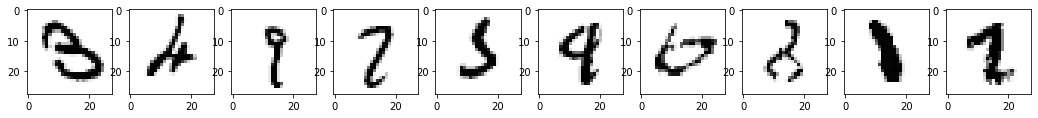

Real labels      [3 4 9 2 5 9 6 8 1 2]
Predicted labels [5 6 8 7 3 8 0 2 8 1]


In [14]:
# Show the mistakes made by the network
plt.figure(None,(18,18))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test[wrong[i]].reshape(28,28),"Greys")
plt.show()
print("Real labels     ", y_test[wrong[0:10]])
print("Predicted labels", best_predicted_test[wrong[0:10]])